<a href="https://colab.research.google.com/github/Farah-Saleem91/Anomaly-detection---Credit-Card/blob/main/anamoly_detection_core_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- this assignment, you will use anomaly detection techniques to detect credit card fraud using this modified dataset originally from Kaggle.
 - Each row represents one credit card transaction.
- This dataset has anonymized features, except for the amount of the transaction.
- Your stakeholder reports that they have found that about 0.4% of transactions are fraudulent, and 99.6% are valid.
- Your task will be to locate anomalous transactions in this data using KMeans and Isolation Forest models
#KMeans:
- Remember to scale your data.
- Fit a KMeans model to create 3 clusters. Please use a random state of 42 for your model.
- Use scipy.spatial.distance.cdist to create a matrix of distances between each - data point and each cluster center
- Define a list of the indices of the anomalous data using the threshold given by the stakeholder (99.6% valid).
- Note that you cannot visualize your clusters since this dataset has 29 features. (To visualize, you could apply PCA to reduce the dimensionality to 2 features, but visualization is not required.)

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
# Get Data
path='/content/drive/MyDrive/AXSOSACADEMY/05-IntermediateML/credit_card.csv'
df = pd.read_csv(path)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [4]:
# Use KMeans to create various customer segments.
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
X_scaled.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.726092,-0.270865,1.389980,0.762227,-0.236899,0.264052,0.285346,0.131083,-0.384443,0.286120,...,0.370795,0.043066,0.689788,-0.163478,0.083851,0.099198,-0.532722,0.312929,-0.090009,0.459472
1,0.949810,-0.013020,-0.647336,0.110710,0.102482,-0.155239,-0.009963,0.120253,-0.915428,0.051569,...,-0.167706,-0.185510,-0.760673,0.268858,-0.603364,0.188884,0.033761,-0.039088,0.043500,-0.333835
2,-0.725138,-1.235035,0.733929,0.062810,-0.377373,1.293991,0.797185,0.249752,-1.995239,0.392444,...,0.830447,0.336466,1.471338,1.918734,-1.193707,-0.959876,-0.442774,-0.153601,-0.234422,1.696110
3,-0.467623,-0.356408,0.750937,-0.808030,0.042565,0.868121,0.283501,0.353112,-1.885794,0.153501,...,-0.401179,-0.056083,0.258431,-0.326493,-2.015264,1.303733,-0.591732,0.137995,0.217896,0.318445
4,-0.593701,0.452248,0.540940,0.079101,-0.295578,-0.018016,0.613062,-0.163028,0.004829,0.888749,...,0.634808,0.052846,1.513434,-0.218569,0.209441,-0.677493,0.710640,0.524976,0.791442,0.029532


In [5]:
# Refit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, n_init= 'auto', random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,cluster
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,2
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,2
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,2
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,2


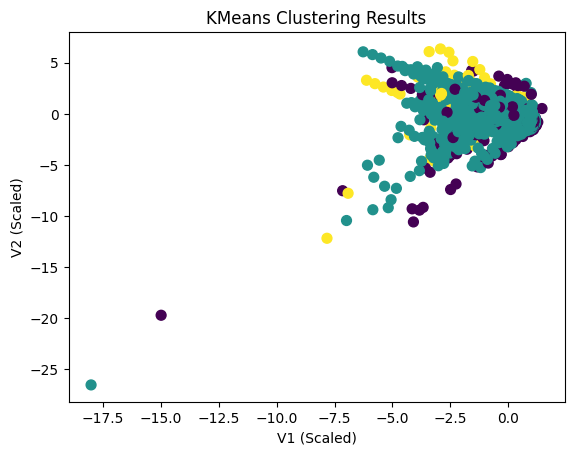

In [8]:
# Plot the data points and identified clusters
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=df['cluster'], s=50, cmap='viridis')
plt.xlabel('V1 (Scaled)')
plt.ylabel('V2 (Scaled)')
plt.title('KMeans Clustering Results')
plt.show()

In [10]:
# Saving the cluster centers as a dataframe for visibility
cluster_centers = pd.DataFrame (kmeans.cluster_centers_, columns=X_scaled.columns)
cluster_centers

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.562876,-0.373036,-0.773280,-0.122793,0.272775,0.710236,-0.233521,0.183856,-0.500804,0.152399,...,0.073084,-0.006122,-0.322439,-0.048543,0.485587,0.626963,-0.157132,0.003467,0.097661,0.163573
1,0.038553,-0.007515,0.193674,0.152989,-0.132329,-0.146710,-0.067318,-0.038558,0.457160,-0.098859,...,-0.070230,-0.042680,-0.009312,0.024708,-0.125136,-0.050194,0.166518,-0.065624,-0.011095,-0.017556
2,-0.568482,0.333627,0.191246,-0.261908,0.085593,-0.250195,0.358566,-0.063380,-0.669343,0.107425,...,0.106084,0.107232,0.295110,-0.018003,-0.111685,-0.410508,-0.265200,0.153980,-0.056110,-0.096435


In [12]:
from scipy.spatial.distance import cdist
# Calculate distance to each cluster center
distances = cdist(X_scaled, kmeans.cluster_centers_, 'euclidean')

In [13]:
# Distances shape is (# rows, # clusters)
distances.shape

(10000, 3)

In [14]:
# Saving distances as a dataframe for convenience
cluter_cols = [f"Distance (Cluster {c})" for c in
range (len(kmeans.cluster_centers_))]
distance_df = pd. DataFrame (distances, columns = cluter_cols)
distance_df.head(3)

,Distance (Cluster 0),Distance (Cluster 1),Distance (Cluster 2)
0,3.763619,4.396796,2.723235
1,2.481479,3.683257,2.964150
2,7.169645,7.345224,6.467058


In [15]:
# Get the minimum distance to any cluster for each point
min_distances = np.min(distances, axis=1)
# Display first 5 values
min_distances [:5]

array([2.72323458, 2.48147889, 6.46705846, 4.84083756, 3.04422311])

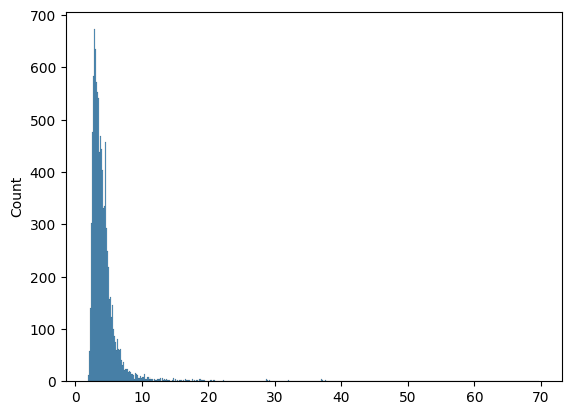

In [16]:
# distance from closet centroid
ax = sns.histplot(min_distances)

In [18]:
# Set a threshold based on a percentile
threshold = np.percentile(min_distances, 95)
threshold

np.float64(7.46029095226553)

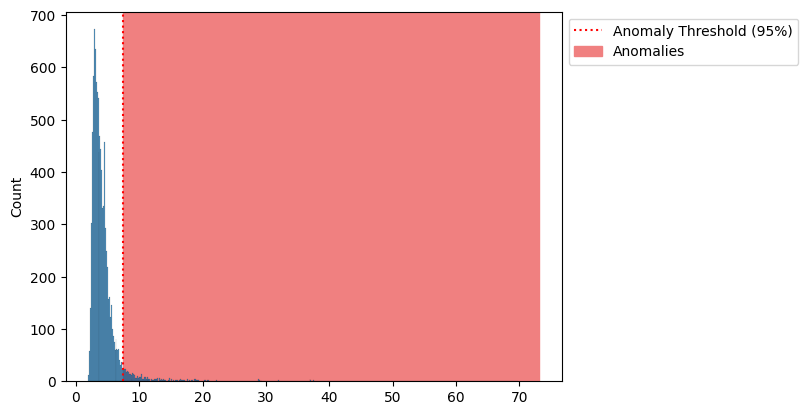

In [19]:
# Visualize the distribution of distances and the anomaly threshold.
ax = sns.histplot(min_distances)
ax.axvline(threshold, color='red', ls=':', label='Anomaly Threshold (95%)')
ax.axvspan(threshold, ax.get_xlim()[1], color='lightcoral', zorder=0,
label='Anomalies')
ax.legend(bbox_to_anchor=[1,1]);

In [20]:
# Identify anomalies where the distance to closest cluster center is above the
threshold
filter_anomalies = min_distances > threshold
# how many were found?
filter_anomalies.sum()

np.int64(500)

In [23]:
# Getting the row indices of the anomalies
idx_anomalies = X_scaled[filter_anomalies].index
idx_anomalies

Index([  18,   49,   67,   80,   81,   83,   87,  127,  135,  141,
       ...
       9903, 9904, 9905, 9919, 9922, 9934, 9965, 9989, 9990, 9992],
      dtype='int64', length=500)

In [24]:
# Slicing the anomalies from X (for demonstration)
X_scaled.iloc[idx_anomalies]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
18,-3.380469,-4.361734,0.229382,1.013084,2.649163,-1.449133,-1.383493,0.180584,0.360999,0.517587,...,-3.742808,-0.491602,1.808083,5.081549,0.041938,-1.317378,-1.309874,0.951301,3.532157,-0.095676
49,-0.493013,-0.965586,-0.823156,2.395856,-5.599025,3.850617,4.117759,-1.546109,-0.935418,-0.006575,...,-0.054958,1.598410,-0.353946,2.041857,0.003632,1.126239,0.406700,2.100442,-0.293332,7.226477
67,-1.096131,-0.877722,1.204138,1.190000,0.406706,-0.384342,0.501022,-0.391480,-1.252993,1.487315,...,-0.672013,-0.693097,-0.983178,2.279369,0.847362,-1.043616,5.320212,-1.471536,-1.489610,-0.159386
80,-1.806791,1.762577,0.485037,-1.897520,0.312336,-0.726518,1.978755,-1.404704,2.741612,5.709970,...,4.076193,-0.875789,-0.036789,-0.272239,0.842221,0.117258,0.634683,-0.637404,-4.137780,-0.340476
81,-0.620455,-1.336928,0.791628,-3.366831,0.330433,-0.226135,0.953246,-0.765160,0.761756,0.131672,...,-1.345152,-0.436040,0.779642,-0.682185,-0.553254,-0.901737,-2.429594,-2.791360,-2.751825,0.133089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9934,-1.675450,1.733410,0.981803,0.774308,-0.551688,2.061373,-1.788711,-5.614826,1.410776,0.631207,...,-2.176977,7.016902,-4.093327,1.868230,0.085957,-0.191883,-1.005823,0.741267,-0.851551,-0.099455
9965,-1.098881,-1.398518,0.518540,1.407755,-2.132901,1.741081,3.022468,-0.102115,0.673610,-1.071991,...,3.462940,-0.003578,-0.782787,3.995358,-0.137456,0.439960,-1.032299,-0.124726,0.061250,4.390914
9989,-2.161027,-1.750662,-0.331867,-0.383512,-2.724976,1.931054,2.230947,-0.897431,0.929551,1.778827,...,-4.229781,-0.678778,2.605925,0.495731,-0.330270,-0.352331,-0.266814,-2.096291,1.892933,3.216854
9990,-2.881727,1.992286,-2.142672,1.553254,-0.691404,-0.893025,-1.415179,-2.540235,0.940572,1.183879,...,-0.834072,2.226613,-0.093993,-1.059471,1.061381,-1.022364,-1.292775,-9.668189,-2.516344,-0.286862


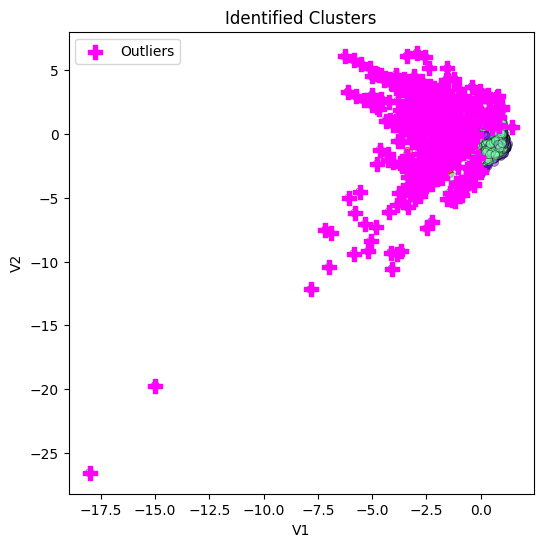

In [27]:
# Plot the data points and identified clusters
fig, ax = plt.subplots (figsize=(6, 6))
ax.scatter(
X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=df["cluster"], ec="black", lw = 0.5, cmap="rainbow",
alpha=0.5
)
ax.set(xlabel="V1 (Scaled)", ylabel="V2 (Scaled)", title="Identified Clusters")
## Plotting the anomalies for visibility.
X_scaled.iloc[idx_anomalies].plot(
x=X_scaled.columns[0], y=X_scaled.columns[1], kind="scatter", color="magenta", label="Outliers", ax=ax,
marker='P', s = 100
);